<a href="https://colab.research.google.com/github/srujanreddy27/Machine_Learning/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install openpyxl

In [14]:
import pandas as pd
data_path='/content/dataset_ML.xlsx'
#data=pd.read_excel(r"C:/Users/srujan/OneDrive/Desktop/projects/ML/dataset_ML.xlsx", engine='openpyxl')
data=pd.read_excel(data_path)
print(data)



                                              Question  \
0                        Print the factors of a number   
1                        Print the factors of a number   
2                        Print the factors of a number   
3                        Print the factors of a number   
4                        Print the factors of a number   
..                                                 ...   
995  Print maximum Occurring Character in a String ...   
996  Print maximum Occurring Character in a String ...   
997  Print maximum Occurring Character in a String ...   
998  Print maximum Occurring Character in a String ...   
999  Print maximum Occurring Character in a String ...   

                                          Correct_Code  \
0    #include <stdio.h>\nvoid printFactors(int numb...   
1    #include <stdio.h>\nvoid printFactors(int numb...   
2    #include <stdio.h>\nvoid printFactors(int numb...   
3    #include <stdio.h>\nvoid printFactors(int numb...   
4    #include

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Load the dataset
file_path = 'dataset_ML.xlsx'
data = pd.read_excel(file_path)

# Define a threshold to classify the code as correct or incorrect
threshold = 6
data['Label'] = (data['Total_Marks'] > threshold).astype(int)

# Splitting the dataset into training and test sets
X = data[['Question', 'Code_with_Error']]  # Features
y = data['Label']  # Target

# For simplicity, use a text representation of the code; in practice, you'd use a more sophisticated feature extraction method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dummy feature extraction: convert the 'Code_with_Error' to a simple count vector
# In real applications, use proper text vectorization techniques like TF-IDF, word embeddings, etc.
X_train_vec = X_train['Code_with_Error'].apply(lambda x: len(x))
X_test_vec = X_test['Code_with_Error'].apply(lambda x: len(x))

# Convert to DataFrame to fit the model
X_train_vec = pd.DataFrame(X_train_vec)
X_test_vec = pd.DataFrame(X_test_vec)

# Train a simple classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_vec, y_train)

# Predict on training and test data
y_train_pred = clf.predict(X_train_vec)
y_test_pred = clf.predict(X_test_vec)

# Calculate confusion matrix and metrics
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print results
print("Training Confusion Matrix:")
print(conf_matrix_train)
print("Training Precision: {:.2f}".format(precision_train))
print("Training Recall: {:.2f}".format(recall_train))
print("Training F1 Score: {:.2f}".format(f1_train))

print("\nTest Confusion Matrix:")
print(conf_matrix_test)
print("Test Precision: {:.2f}".format(precision_test))
print("Test Recall: {:.2f}".format(recall_test))
print("Test F1 Score: {:.2f}".format(f1_test))

# Inference on the model's learning outcome
if precision_train > precision_test and recall_train > recall_test:
    print("\nThe model is overfitting.")
elif precision_train < precision_test and recall_train < recall_test:
    print("\nThe model is underfitting.")
else:
    print("\nThe model is regular fitting.")


Training Confusion Matrix:
[[363  54]
 [ 67 316]]
Training Precision: 0.85
Training Recall: 0.83
Training F1 Score: 0.84

Test Confusion Matrix:
[[56 43]
 [40 61]]
Test Precision: 0.59
Test Recall: 0.60
Test F1 Score: 0.60

The model is overfitting.


Results for k = 1:
{'k': 1, 'accuracy_train': 0.80375, 'accuracy_test': 0.555, 'precision_train': 0.8210227272727273, 'recall_train': 0.7545691906005222, 'f1_train': 0.7863945578231292, 'precision_test': 0.5666666666666667, 'recall_test': 0.504950495049505, 'f1_test': 0.5340314136125655}

Results for k = 3:
{'k': 3, 'accuracy_train': 0.7725, 'accuracy_test': 0.55, 'precision_train': 0.7723577235772358, 'recall_train': 0.7441253263707572, 'f1_train': 0.7579787234042554, 'precision_test': 0.5533980582524272, 'recall_test': 0.5643564356435643, 'f1_test': 0.5588235294117647}


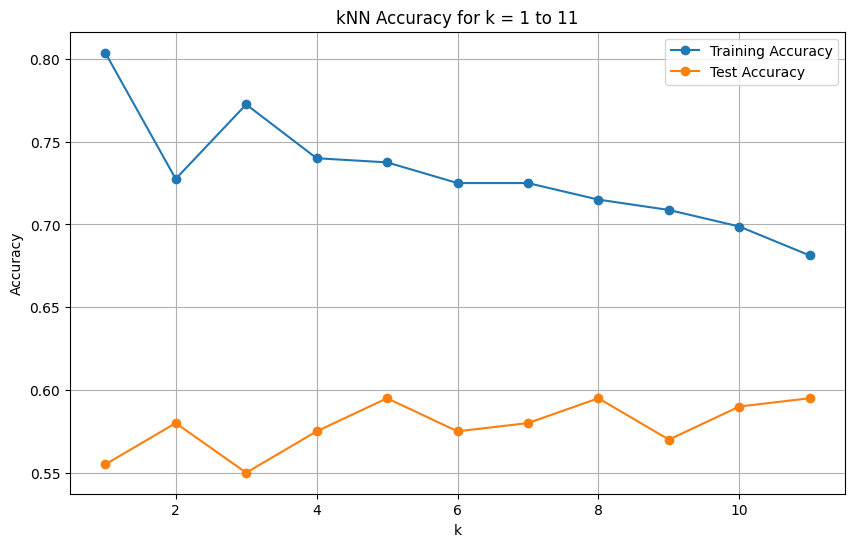

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Load the dataset
file_path = 'dataset_ML.xlsx'
data = pd.read_excel(file_path)

# Define a threshold to classify the code as correct or incorrect
threshold = 6
data['Label'] = (data['Total_Marks'] > threshold).astype(int)

# Splitting the dataset into training and test sets
X = data[['Question', 'Code_with_Error']]  # Features
y = data['Label']  # Target

# For simplicity, use a text representation of the code; in practice, you'd use a more sophisticated feature extraction method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dummy feature extraction: convert the 'Code_with_Error' to a simple count vector
# In real applications, use proper text vectorization techniques like TF-IDF, word embeddings, etc.
X_train_vec = X_train['Code_with_Error'].apply(lambda x: len(x)).values.reshape(-1, 1)
X_test_vec = X_test['Code_with_Error'].apply(lambda x: len(x)).values.reshape(-1, 1)

# Function to evaluate a kNN model
def evaluate_knn(k, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)

    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)

    return {
        'k': k,
        'accuracy_train': accuracy_train,
        'accuracy_test': accuracy_test,
        'precision_train': precision_train,
        'recall_train': recall_train,
        'f1_train': f1_train,
        'precision_test': precision_test,
        'recall_test': recall_test,
        'f1_test': f1_test,
    }

# Evaluate kNN with k = 1 and k = 3
results_k1 = evaluate_knn(1, X_train_vec, y_train, X_test_vec, y_test)
results_k3 = evaluate_knn(3, X_train_vec, y_train, X_test_vec, y_test)

print("Results for k = 1:")
print(results_k1)

print("\nResults for k = 3:")
print(results_k3)

# Evaluate kNN for k values from 1 to 11 and plot accuracy
k_values = range(1, 12)
accuracies_train = []
accuracies_test = []

for k in k_values:
    results = evaluate_knn(k, X_train_vec, y_train, X_test_vec, y_test)
    accuracies_train.append(results['accuracy_train'])
    accuracies_test.append(results['accuracy_test'])

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies_train, label='Training Accuracy', marker='o')
plt.plot(k_values, accuracies_test, label='Test Accuracy', marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('kNN Accuracy for k = 1 to 11')
plt.legend()
plt.grid(True)
plt.show()
